In [1]:
# Import packages
import numpy as np
import pandas as pd


In [52]:
import os
import statsmodels .formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import dexplot as dxp

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings('ignore')
np.random.seed(123)

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
df=pd.read_csv('new_sleep.csv')
df=df.drop(columns = ['quality'],axis=1)

In [9]:

X = df.drop(columns = ['sm_quality'])
Y = df['sm_quality']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.34)

In [10]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()

['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [11]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [58]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [61]:
SVM.fit(X,Y)
import numpy as np
import pandas as pd
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [68]:
XX=np.array(X.values)
YY=np.array(Y.values)

ValueError: Filler values must be provided when X has more than 2 training features.

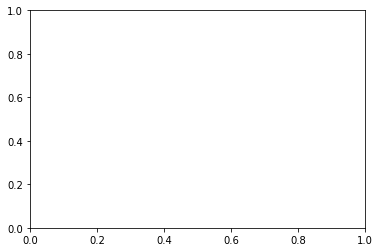

In [73]:
# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=XX, 
                      y=YY,
                      clf=SVM)

# Update plot object with X/Y axis labels and Figure Title


In [53]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()

['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

Text(0.5, 0, 'LD1')

Text(0, 0.5, 'LD2')

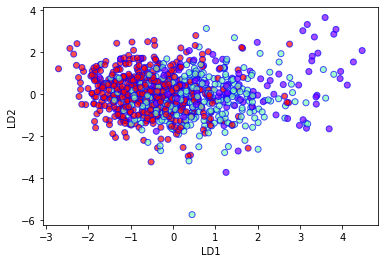

In [45]:
X_lda=LDA.fit_transform(X,Y)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=Y,
    cmap='rainbow_r',
    alpha=0.7,
    edgecolors='b'
)

In [57]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()



['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

  ERROR: Could not find a version that satisfies the requirement scikits (from versions: none)
ERROR: No matching distribution found for scikits


ModuleNotFoundError: No module named 'scikits'

In [51]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [439]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()

['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [440]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [441]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1]
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score
2,Support Vector Machine,0.067518,0.009005,0.643175,0.470146,0.475411,0.606208
3,Linear Discriminant Analysis,0.005417,0.008769,0.641763,0.571022,0.528362,0.617594
7,Bayes,0.003171,0.007524,0.631048,0.560506,0.538738,0.616710
5,Random Forest,0.019840,0.010678,0.630227,0.545282,0.501225,0.608214
0,Logistic Regression,0.007979,0.007433,0.627630,0.481063,0.464169,0.586101
4,Quadratic Discriminant Analysis,0.003245,0.007372,0.605920,0.495246,0.493457,0.588890
6,K-Nearest Neighbors,0.002650,0.015168,0.597165,0.477150,0.440664,0.553411
1,Decision Tree,0.006468,0.007726,0.526597,0.446075,0.450191,0.518192


In [417]:
X

,efficiency,avg_bedtime,avg_actual_sleeptime,weekday_midnight,weekend_midnight,disorder,motivation,ontime_bed,outside_noise,inside_noise,light,temperature,mattress,health
0,0.605970,11.964286,7.250000,1,1,0,3,4,2,1,1,3,1,3
1,0.888889,9.000000,8.000000,1,1,0,4,3,3,2,2,3,2,2
2,0.957265,8.357143,8.000000,1,1,0,5,5,1,1,1,2,1,2
3,0.892857,8.000000,7.142857,1,0,0,4,3,1,1,2,2,1,2
4,1.000000,7.500000,7.500000,1,1,0,3,3,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,0.783784,10.571429,8.285714,1,1,0,4,4,3,3,2,2,3,1
989,1.000000,8.357143,9.000000,0,0,0,2,2,2,1,1,2,2,1
990,0.848606,8.964286,7.607143,0,0,0,5,4,1,1,1,2,1,2
991,1.000000,6.892857,8.571429,1,1,0,4,4,2,3,3,3,5,1


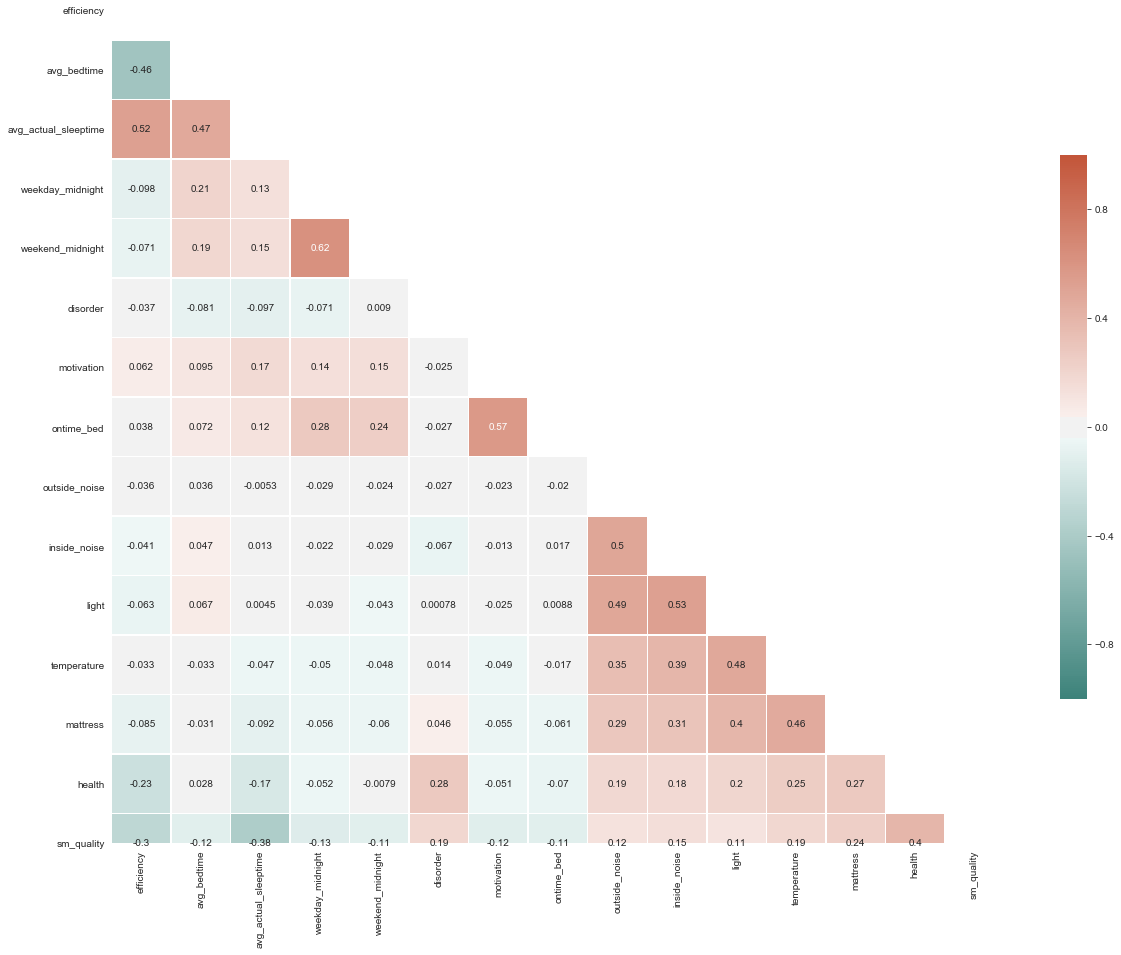

In [281]:

correlation = df.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [418]:
X_corr=df[['weekday_midnight','weekend_midnight','disorder',"avg_bedtime",'motivation',"outside_noise",'light','temperature']]

In [419]:
y_corr=df['sm_quality']

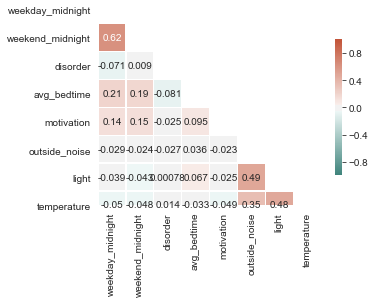

In [420]:
correlation = X_corr.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(5, 5))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [421]:
X_train, X_test, y_train, y_test = train_test_split(X_corr,y_corr,test_size=0.34)

In [422]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [415]:
LR_accuracy

0.5799652118912081

In [423]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [53]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [54]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()


TypeError: 'Series' object cannot be interpreted as an integer

In [426]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [427]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [428]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [429]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [430]:
models_correlation = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1]
   
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score'])

models_correlation.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score
2,Support Vector Machine,0.074923,0.008324,0.600720,0.398375,0.419591,0.543437
7,Bayes,0.002995,0.007232,0.587081,0.535320,0.471655,0.556336
0,Logistic Regression,0.008057,0.010079,0.577425,0.411361,0.404602,0.518430
3,Linear Discriminant Analysis,0.003635,0.006370,0.569464,0.419244,0.406038,0.513535
4,Quadratic Discriminant Analysis,0.002779,0.006860,0.550805,0.437941,0.412871,0.507253
6,K-Nearest Neighbors,0.002548,0.013720,0.524964,0.368264,0.372715,0.478385
5,Random Forest,0.018407,0.010624,0.512597,0.386822,0.391600,0.492256
1,Decision Tree,0.005248,0.008821,0.471616,0.374986,0.380189,0.464239


In [339]:
models = [LogisticRegression(),
         DecisionTreeClassifier(),
         SVC(probability = True),
         LinearDiscriminantAnalysis(),
         QuadraticDiscriminantAnalysis(),
         RandomForestClassifier(),
         KNeighborsClassifier(),
         GaussianNB()]

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']



In [340]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34)

In [343]:
#for model in models:
   # scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=20)
    #print(model, scores['fit_time'].mean(), scores['score_time'].mean(), scores['test_accuracy'].mean(),
         # scores['test_precision_macro'].mean(), scores['test_recall_macro'].mean(), 
         # scores['test_f1_weighted'].mean())

In [353]:
X = df.drop(columns = ['sm_quality'])
Y = df['sm_quality']
#Y= label_binarize(Y, classes=[1, 2, 3])

In [354]:
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_svc = model.transform(X)
X_svc.shape #reduction from 30 to 10 features

(993, 13)

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X_svc,y,test_size=0.34)

In [356]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [357]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [358]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [359]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [360]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [361]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [362]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [363]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [364]:
models_sfm = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1]
    
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score'])

models_sfm.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score
3,Linear Discriminant Analysis,0.009892,0.015361,0.505632,0.417417,0.384435,0.466387
2,Support Vector Machine,0.090194,0.006408,0.496780,0.336769,0.305578,0.449136
0,Logistic Regression,0.010142,0.004154,0.493311,0.303542,0.314170,0.433451
7,Bayes,0.002438,0.005407,0.482522,0.389428,0.412223,0.467480
6,K-Nearest Neighbors,0.002775,0.015801,0.443703,0.316098,0.301378,0.412650
4,Quadratic Discriminant Analysis,0.006940,0.010373,0.429119,0.330014,0.298741,0.412041
5,Random Forest,0.024703,0.010382,0.422728,0.316054,0.310082,0.399262
1,Decision Tree,0.004039,0.004696,0.349682,0.275411,0.297428,0.343208


In [378]:
X = df.drop(columns = ['sm_quality'])
Y = df['sm_quality']
#Y= label_binarize(Y, classes=[1, 2, 3])
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False)
model = RFECV(estimator=lsvc, step=1, cv=20).fit(X,y)
X_rfecv = model.transform(X)
X_rfecv.shape #reduction from 13

(993, 9)

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X_rfecv,y,test_size=0.34)

In [380]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [381]:
LR_accuracy

0.5014819498180504

In [382]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [383]:
dtree_accuracy

0.39265953962230055

In [384]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [385]:
SVM_accuracy

0.5224933283430675

In [386]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [387]:
LDA_accuracy

0.5149045021234299

In [388]:



lsvc = LinearSVC(C=0.05, penalty="l1", dual=False).fit(X, y)
etc = ExtraTreesClassifier()
etc.fit(X, y)

model = SelectFromModel(etc, prefit=True)
X_etc = model.transform(X)
X_etc.shape 

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

(993, 7)

In [389]:
X_train, X_test, y_train, y_test = train_test_split(X_etc,y,test_size=0.34)


In [390]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_weighted',
 'test_precision_macro',
 'test_recall_macro']

In [391]:
LR_accuracy

0.4902291714584172

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')

from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn import tree

#!pip install graphviz
import graphviz 

In [269]:
df=pd.read_csv('new_sleep.csv')

In [165]:
df.shape
df.head(3)

(993, 16)

,efficiency,avg_bedtime,avg_actual_sleeptime,quality,weekday_midnight,weekend_midnight,disorder,motivation,ontime_bed,outside_noise,inside_noise,light,temperature,mattress,health,sm_quality
0,0.605970,11.964286,7.25,4,1,1,0,3,4,2,1,1,3,1,3,1
1,0.888889,9.000000,8.00,4,1,1,0,4,3,3,2,2,3,2,2,1
2,0.957265,8.357143,8.00,4,1,1,0,5,5,1,1,1,2,1,2,1


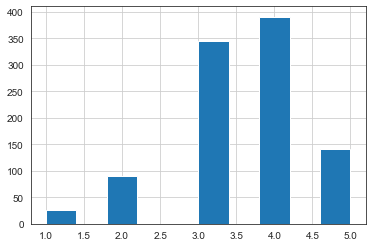

In [11]:
df.quality.hist()

In [30]:
transformer = FunctionTransformer(func = np.log, inverse_func= np.exp)
y = transformer.transform(df.quality.values.reshape(-1,1))

/Users/MichaelMiao/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [48]:
X=df[['health','efficiency']]

Text(0.5, 1.0, 'Histogram (dist) plot of log sleep quality')

Text(0.5, 0, 'health')

Text(0, 0.5, 'efficiency')

Text(0.5, 1.0, 'Scatter plot - colors are log sleep quality')

<function matplotlib.pyplot.show(*args, **kw)>

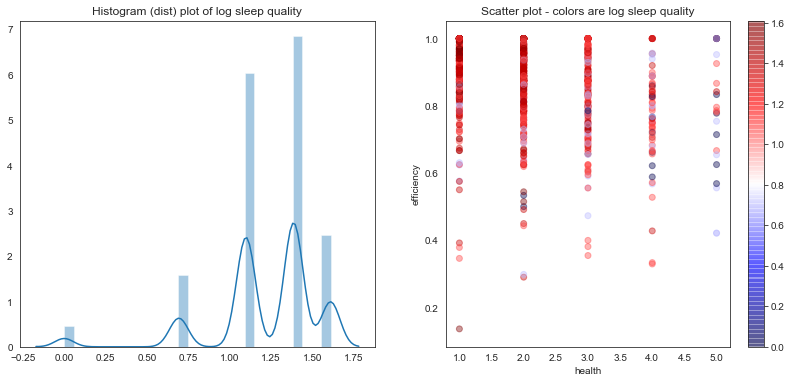

In [37]:
fig = plt.figure(figsize = (14,6))
ax = plt.subplot(121)
ax = sns.distplot(y)
ax.set_title('Histogram (dist) plot of log sleep quality')

ax = plt.subplot(122)
ax.set_xlabel('health')
ax.set_ylabel('efficiency')
ax.set_title('Scatter plot - colors are log sleep quality')

ax2 = ax.scatter(df.health, df.efficiency, alpha = .4, c = y.flatten(), cmap = 'seismic')
plt.colorbar(ax2)

plt.show

In [40]:
from sklearn.tree import DecisionTreeRegressor
simple_tree = DecisionTreeRegressor(random_state = 0, max_depth = 2, max_leaf_nodes=3)
simple_tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=3, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

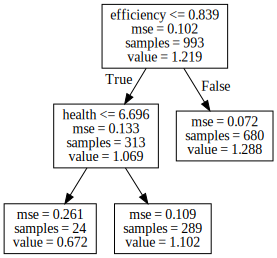

In [45]:
from sklearn import tree
import graphviz 

dot_data = tree.export_graphviz(simple_tree, out_file=None, feature_names = ['health','efficiency'], class_names = ['quality'])  
graph = graphviz.Source(dot_data)  
graph 

In [42]:
!brew install graphviz

Updating Homebrew...
==> Downloading https://homebrew.bintray.com/bottles-portable-ruby/portable-ruby-2.6.3.mavericks.bottle.tar.gz
######################################################################## 100.0%                    19.8%                     39.2%
==> Pouring portable-ruby-2.6.3.mavericks.bottle.tar.gz
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
adios2                     grin-wallet                openjdk@12
alp                        helm@2                     pastel
appium                     javacc                     pdfcpu
arduino-cli                jd                         pdftk-java
atasm                      kepubify                   php@7.3
aws-cdk                    kind                       pnetcdf
awsume                     krew                       pnpm
base91                     kubebuilder                pokerstove
berglas                    kyma-cli                   postgresql@11
bingrep            

<Figure size 576x576 with 0 Axes>

Text(0.5, 0, 'Years')

Text(0, 0.5, 'Hits')

Text(0.5, 1.0, 'Three region partition - simple regression tree')

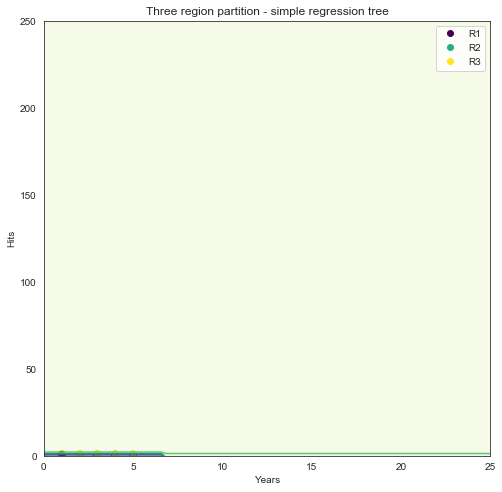

In [49]:
#Scatter plot
log_preds = np.round(simple_tree.predict(X),2).flatten()
color_dict = {'R1': '#440154FF', 'R2': '#29AF7FFF', 'R3': '#FDE725FF'}
plt.figure(figsize = (8,8))
plt.scatter(X.health, X.efficiency, c = log_preds, cmap = 'viridis')

#Plot decision boundary
N = 100
X1 = np.linspace(0, 25, N)
X2 = np.linspace(0, 250, N)
X1, X2 = np.meshgrid(X1, X2)
zz = np.array(  [simple_tree.predict( np.array([xx,yy]).reshape(1,-1)) 
                 for xx, yy in zip(np.ravel(X1), np.ravel(X2)) ] )
Z = zz.reshape(X1.shape)
plt.contourf( X1, X2, Z, 3, alpha = .1, cmap = 'viridis')
plt.contour( X1, X2, Z, 3, alpha = 1, cmap = 'viridis')

# Legend
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1)
plt.xlabel('Years')
plt.ylabel('Hits')
plt.title('Three region partition - simple regression tree')
plt.show()

In [51]:
new_sleep=df

In [55]:
#!pip install sklearn
#!pip install pydotplus
import pydotplus
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import export_graphviz

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

array([4, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 3, 4,
       4, 3, 3, 3, 4, 3, 4, 3, 3, 4, 3, 3, 4, 3, 4, 3, 3, 4, 3, 4, 5, 4,
       3, 4, 3, 4, 3, 3, 4, 4, 4, 4, 3, 4, 5, 3, 3, 3, 4, 4, 3, 3, 4, 3,
       4, 3, 3, 3, 4, 3, 5, 4, 4, 4, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 4, 4,
       4, 4, 4, 3, 3, 5, 4, 3, 4, 4, 5, 4, 3, 4, 3, 3, 4, 4, 4, 3, 3, 3,
       3, 5, 3, 3, 3, 5, 5, 4, 4, 4, 3, 4, 4, 4, 4, 3, 5, 3, 4, 3, 4, 3,
       3, 4, 4, 4, 4, 3, 3, 4, 4, 3, 3, 3, 5, 4, 4, 4, 4, 4, 5, 5, 3, 4,
       4, 4, 4, 4, 5, 5, 4, 4, 3, 3, 5, 3, 3, 3, 5, 4, 3, 3, 5, 4, 3, 4,
       2, 5, 2, 3, 4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 3, 4, 5, 4, 4, 4, 4, 4,
       3, 5, 4, 4, 4, 4, 4, 4, 3, 4, 3, 3, 4, 4, 4, 3, 4, 3, 3, 3, 4, 5,
       3, 4, 4, 3, 4, 4, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 4, 4, 4, 3, 3, 3,
       3, 4, 4, 5, 3, 3, 3, 4, 4, 5, 3, 4, 3, 4, 4, 4, 3, 4, 3, 4, 3, 3,
       4, 4, 4, 3, 3, 5, 3, 4, 4, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 3, 4, 3,
       4, 3, 3, 4, 4, 3, 4, 5, 4, 5, 4, 4])

44.63087248322148

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

array([3, 2, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 1, 3, 4, 4, 3, 3, 4, 3, 4,
       4, 3, 3, 3, 4, 2, 4, 3, 3, 4, 1, 3, 4, 3, 4, 3, 3, 4, 3, 4, 4, 4,
       3, 4, 3, 4, 3, 3, 4, 4, 4, 4, 3, 4, 4, 3, 3, 3, 4, 4, 1, 1, 4, 3,
       4, 2, 3, 2, 4, 3, 4, 4, 4, 4, 3, 4, 3, 3, 3, 3, 4, 4, 2, 3, 4, 4,
       3, 4, 4, 2, 1, 4, 3, 1, 4, 3, 4, 3, 2, 4, 1, 2, 4, 4, 4, 3, 3, 3,
       3, 4, 3, 3, 3, 4, 4, 4, 3, 4, 1, 4, 4, 4, 4, 3, 4, 3, 3, 3, 4, 3,
       1, 4, 4, 3, 4, 2, 3, 4, 4, 3, 1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4,
       3, 4, 4, 4, 4, 4, 4, 3, 1, 3, 4, 2, 3, 3, 4, 4, 1, 3, 4, 4, 3, 4,
       3, 4, 3, 3, 4, 4, 3, 4, 3, 4, 3, 4, 3, 3, 2, 4, 4, 4, 4, 4, 4, 4,
       2, 4, 4, 4, 4, 4, 4, 4, 3, 4, 2, 3, 4, 4, 4, 1, 4, 3, 3, 3, 4, 4,
       3, 4, 4, 3, 4, 4, 3, 3, 4, 3, 4, 4, 3, 2, 4, 3, 4, 4, 4, 3, 3, 2,
       3, 4, 4, 4, 3, 2, 3, 4, 4, 4, 3, 4, 3, 4, 4, 4, 3, 3, 3, 4, 2, 3,
       4, 4, 4, 3, 3, 4, 3, 3, 4, 1, 3, 4, 4, 1, 3, 3, 3, 4, 4, 3, 4, 2,
       4, 3, 2, 4, 4, 3, 4, 4, 4, 4, 4, 4])

44.63087248322148

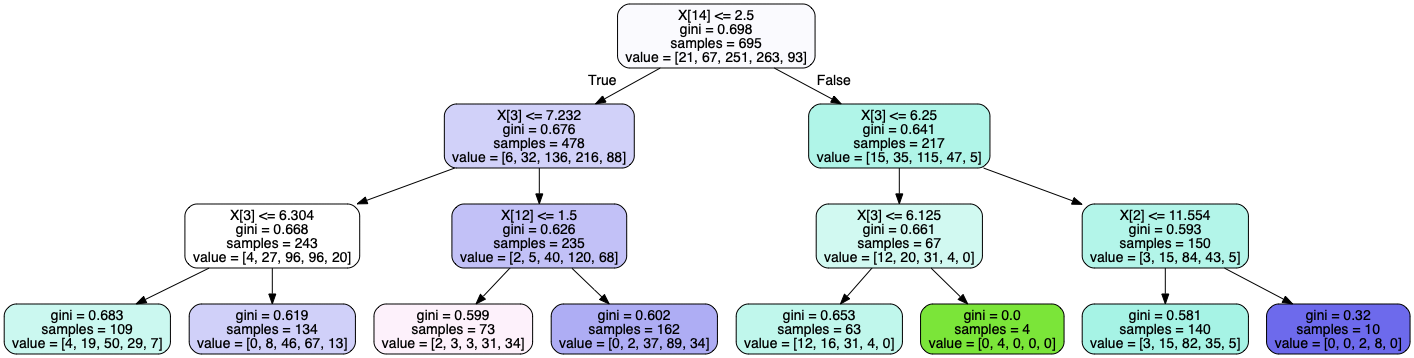

In [67]:
X = new_sleep.drop(columns = ['quality'])
Y = new_sleep['quality']
# Decision Tree
sleep_train, sleep_test, Quality_train, Quality_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)
# Classsifier with criterion as gini index
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state =100,
                                  max_depth = 3, min_samples_leaf=3)


clf_gini.fit(sleep_train, Quality_train)
Quality_pred = clf_gini.predict(sleep_test)
Quality_pred
accuracy_score(Quality_test,Quality_pred)*100
# Classifier with criterion information gain

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(sleep_train, Quality_train)
y_pred_en = clf_entropy.predict(sleep_test)
y_pred_en
accuracy_score(Quality_test,y_pred_en)*100
# Visualize data
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = tree.export_graphviz(clf_gini,                    
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [71]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 


In [79]:

# X -> features, y -> label 
X = df.drop(['quality'],axis=1)
y = df[['quality']]
  
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
  
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions) 

ValueError: Number of features of the model must match the input. Model n_features is 14 and input n_features is 4 

In [89]:
len(dtree_predictions)
y_test.shape


249

(249, 1)

In [96]:
np.mean(dtree_predictions==y_test.quality)

0.4578313253012048

In [193]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
  

# X -> features, y -> label 

  
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
  
# training a linear SVM classifier 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
accuracy

0.5341365461847389

In [112]:

np.mean(svm_predictions==y_test.quality)


0.5261044176706827

In [106]:
accuracy

0.5341365461847389

In [194]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
  



  
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
  
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print (accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions)

0.5060240963855421


In [195]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
  
#X=df.drop(['quality','avg_actual_sleeptime', 'ontime_bed','light','outside_noise','weekday_midnight','weekend_midnight'],axis=1)
  
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
  
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print(accuracy) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions) 

0.46184738955823296
